<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 12 **
** ┗ Credit score prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉SESSION 1 -「Understanding the distribution of credit scores」
* 🥈Session 2 -「Credit score impact factor analysis」
* 🥇SESSION 3 -「ML Use Credit Score prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount or folder click Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/12_Credit Score Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/12_Credit Score Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 💯 (Credit Ratings)

``
A company purchases and uses credit score data from other credit rating agencies every year.The license costs that occur as the use of the data are not easy.
Therefore, Company A intends to create a model that predicts credit scores by using its data as part of this year's new project.

``


> ** Looking at the data **

* Credit score and customer profile information
* Data specification ⬇

| Loan ID | Customer ID | Loan Status | Current Loan Amount | Term | Credit Score |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Loan ID | Customer ID | Loan status | Current loan balance | Loan period | Credit score |
| Annual Income | Years in Current Job | Home Ownership | Purpose | Monthly Debt | Years of Credit History |
| Lanterns | Vocational year | Whether or not self -purpose | Loan purpose | Monthly refund amount | Credit record |
Month SINCE LAST Delinquent | Number of Open Accounts | Number of Credit Problems | Current Credit Balance | Maximum Open Credit | Bankruptcies |
| Month after the last delinquency | Number of valid accounts | Credit defects | Current credit limit | Maximum credit limit | Bankruptcy |
| Tax Liens |
| Tax library |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter12_credit_score.csv')
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Excessive license costs caused by the absence of a credit rating model
``

> ** Expected effect **

``
▶ Reduce license costs using our credit rating model
``

> ** Solution **

``
▶ Creating and utilizing the credit rating model of our DATA
▶ Session 1 🥉
-Concend the distribution of credit scores using data pretreatment and Distplot
▶ Session 2 🥈
-Numeric (continuous), Categorical (category) average credit score by variable
▶ Session 3 🥇
-Creation of credit score prediction models using ML algorithms
``

> ** Performance measurement **

``
▶ annual license cost reduction amount
``

> ** Public application **

``
▶ Create data Mart for input to Model every month
▶ Calculation of credit scores by customers using monthly models
▶ Confirmation of consistency between credit scores and external companies' credit scores
▶ Discussion of conversion of its model after confirmation of consistency
``

> ** Main code preview **

``
▶ Session 1 → DropNA (Subset = ['']), Fillna (0), Drop_duplicates
▶ Session 2 → Pearsonr, Groupby.Mean ()
▶ Session 3 → List.remove ('), Labelencoder (), Mean_absolute_error, R2_SCORE
``


## ** 🥉Session 1 **
** ┗ Identify the distribution of credit score **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 100,514 row, 19 cola
print('df', df.shape)

df (100514, 19)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


In [ ]:
# ▶ Target data is removed because data without credit score cannot be used
df=df.dropna(subset=['Credit Score','Years in current job', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'])
df['Months since last delinquent'].fillna(0.0, inplace=True)

In [ ]:
# ▶ Respect
print(df.isnull().sum())

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


In [ ]:
# ▶ Duplicate confirmation of customer ID standards
df[df['Customer ID']=='981165ec-3274-42f5-a3b4-d104041a9ca9']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
38854,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0


In [ ]:
# ▶ Duplicate of customer ID standards
df.drop_duplicates(['Customer ID'], keep = 'first', inplace=True)

In [ ]:
df.shape

(64055, 19)

### · Credit score distribution confirmation
---


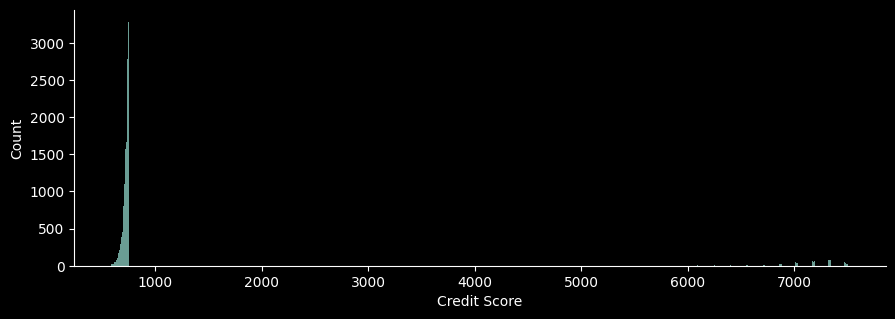

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df['Credit Score'])
plt.gcf().set_size_inches(10, 3)

In [ ]:
df['Credit Score'].describe()

,Credit Score
count,64055.000000
mean,1148.426196
std,1599.706075
min,585.000000
25%,710.000000
50%,730.000000
75%,743.000000
max,7510.000000


In [ ]:
# ▶ Assuming that the credit score is 1,000 points, more data is likely to be a data with errors.Remove it.
df = df[df['Credit Score']<=1000]
df.shape

(59761, 19)

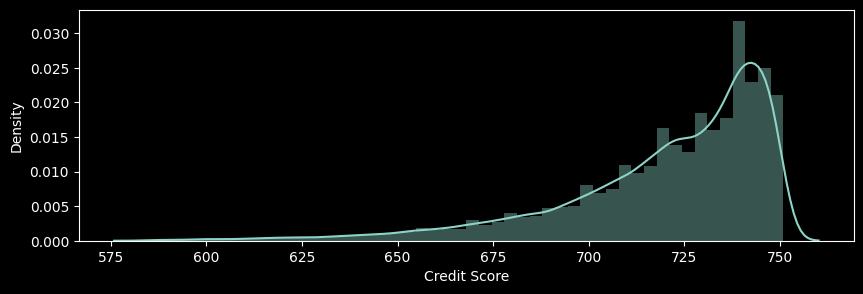

In [ ]:
# ▶ Check the distribution of regular data after pretreatment
sns.distplot(df['Credit Score'])
plt.gcf().set_size_inches(10, 3)

## ** 🥈Session 2 **
** ┗ Credit score impact factor analysis **
---


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
numeric_list : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']



### · Numeric variable
---


In [ ]:
df[numeric_list].head(3)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0


PearsonRResult(statistic=np.float64(0.08182908654881714), pvalue=np.float64(2.6115173645174195e-89))


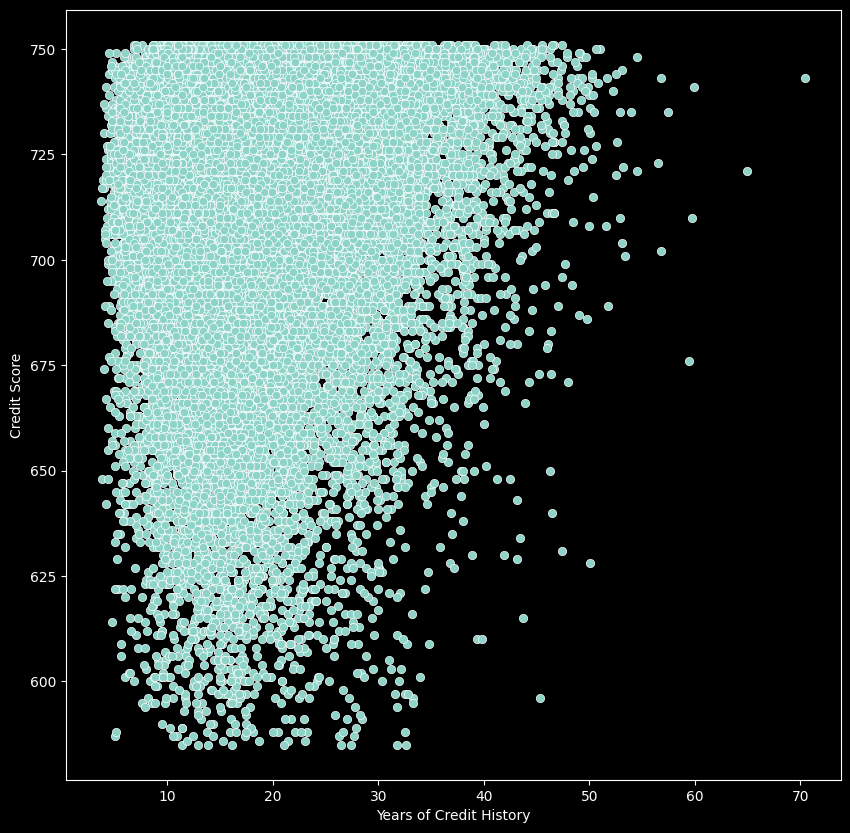

In [ ]:
# ▶ Years of Credit History Check the correlation coefficient with credit scores

import scipy.stats as stats
val='Years of Credit History'

# Pass data using the 'x' and 'y' keyword arguments
sns.scatterplot(x=df[val], y=df['Credit Score']);
print(stats.pearsonr(df[val], df['Credit Score']))
plt.gcf().set_size_inches(10, 10)

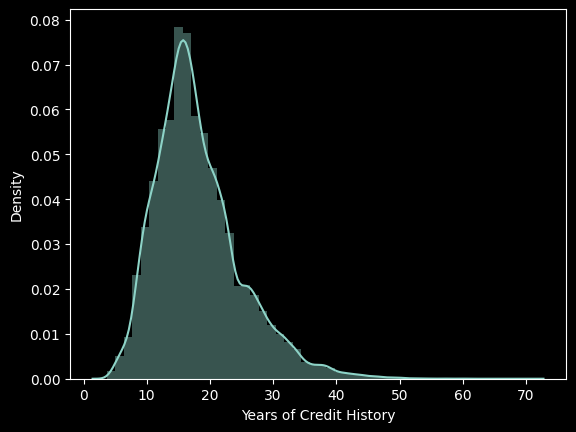

In [ ]:
sns.distplot(df[val]);

In [ ]:
# ▶ Sectionization
import numpy as np
df['gp'] = np.where (df[val] <= 10, 1,
                           np.where(df[val] <= 20, 2, 3))

df[[val,'gp']]

,Years of Credit History,gp
0,17.2,2
2,14.9,2
3,12.0,2
6,19.6,2
8,22.6,3
...,...,...
99990,20.1,3
99994,17.4,2
99996,9.4,1
99997,18.8,2


In [ ]:
# ▶ As expected in the correlation coefficient (0.08), there is no big difference
df.groupby('gp')['Credit Score'].mean()

,Credit Score
gp,
1,714.098887
2,719.841905
3,722.612636


### · categorical variable
---


In [ ]:
df[categoical_list].iloc[:, 2:].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation


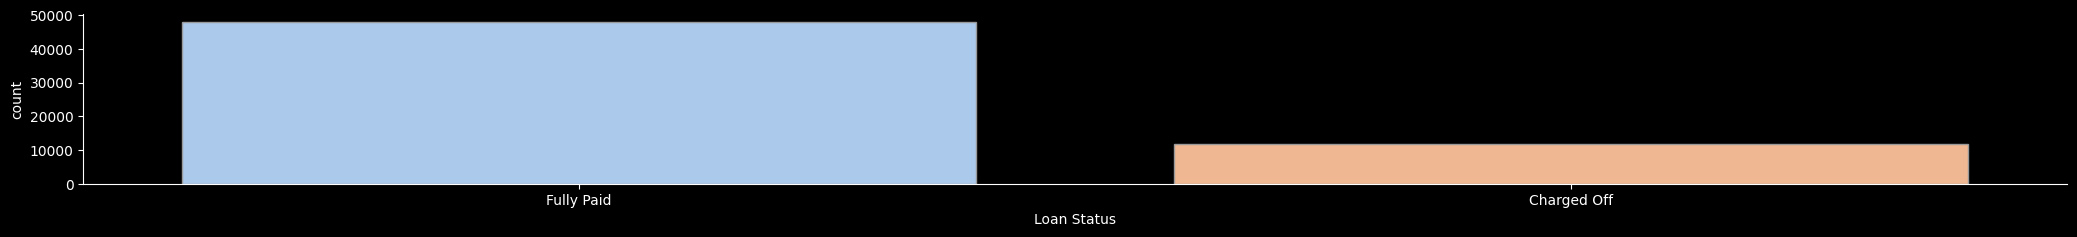

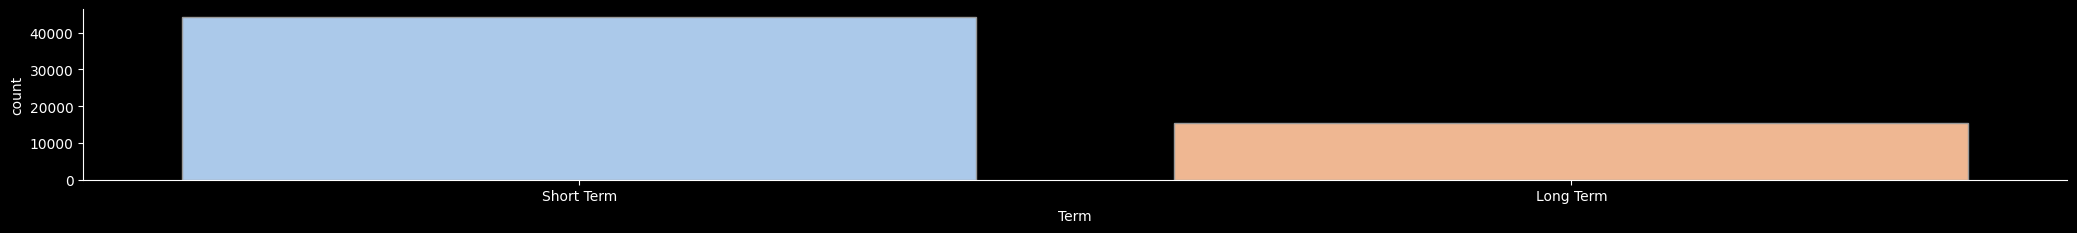

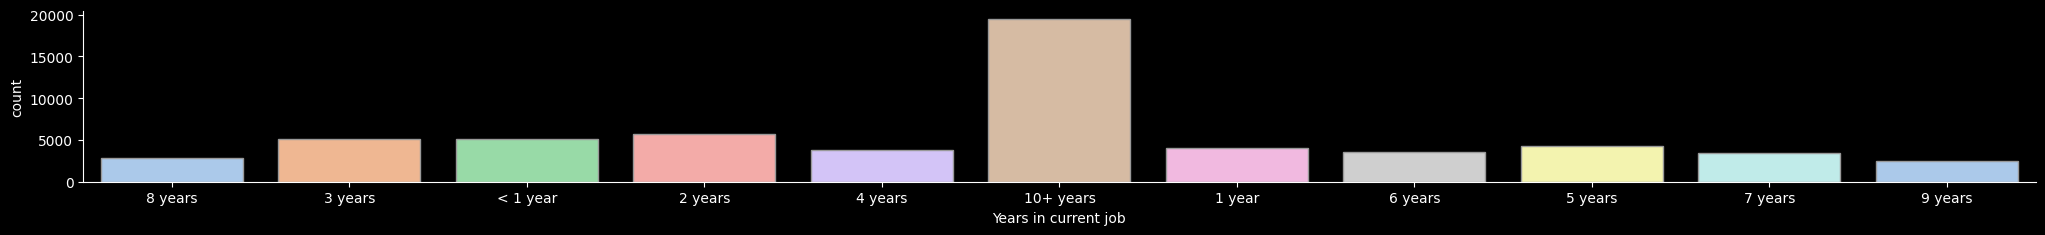

In [ ]:
# ▶ Catplot for category variables
sns.catplot(x="Loan Status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 2)

sns.catplot(x="Term", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 2)

sns.catplot(x="Years in current job", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 2)

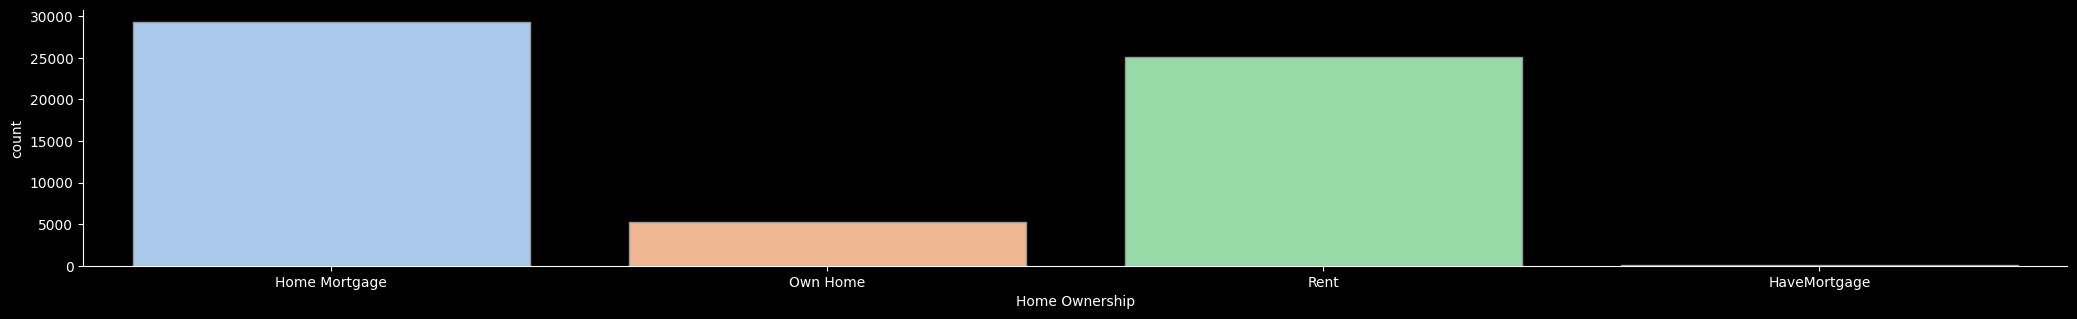

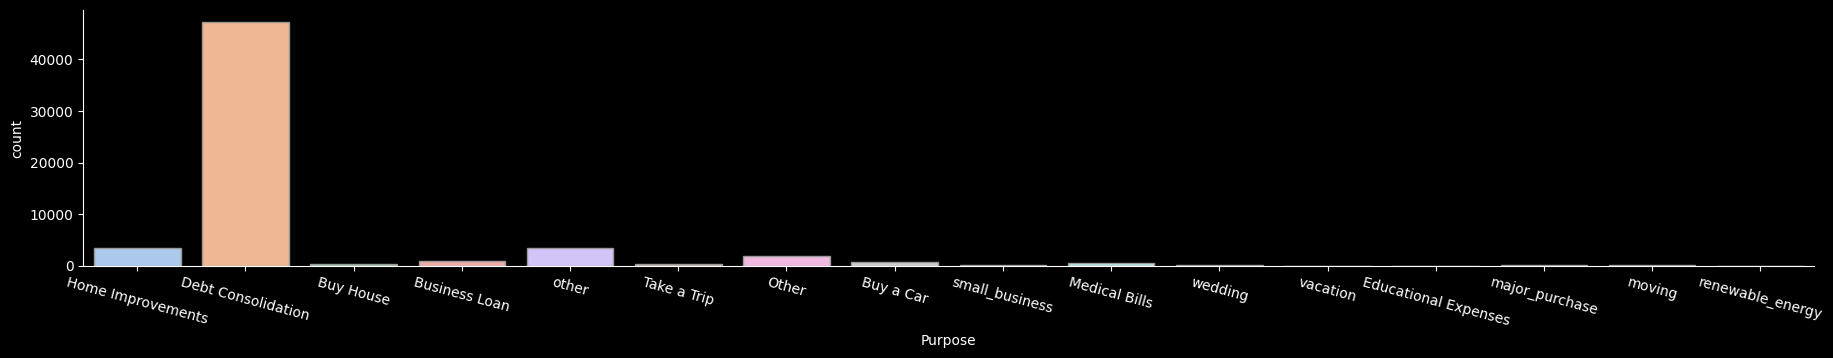

In [ ]:
sns.catplot(x="Home Ownership", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)

sns.catplot(x="Purpose", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.xticks(rotation=-15)
plt.gcf().set_size_inches(25, 3)

In [ ]:
# ▶ Category variable list
print(categoical_list)

['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [ ]:
# ▶ Loan ID and Customer ID are separated
categoical_list[2:]

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

In [ ]:
for i in categoical_list[2:] :
  print(df.groupby(i)['Credit Score'].mean().sort_values(ascending=False))
  print('')
  print('-------------------------------------')

Loan Status
Fully Paid     722.800443
Charged Off    709.825839
Name: Credit Score, dtype: float64

-------------------------------------
Term
Short Term    728.125189
Long Term     697.727308
Name: Credit Score, dtype: float64

-------------------------------------
Years in current job
1 year       721.161307
< 1 year     720.933871
2 years      720.796908
3 years      720.536819
4 years      720.517060
8 years      720.314365
6 years      720.281515
5 years      720.247259
7 years      719.727642
9 years      719.636364
10+ years    719.634629
Name: Credit Score, dtype: float64

-------------------------------------
Home Ownership
Home Mortgage    721.693731
HaveMortgage     720.576923
Own Home         719.113319
Rent             718.706197
Name: Credit Score, dtype: float64

-------------------------------------
Purpose
Buy a Car               728.040201
major_purchase          725.208333
Educational Expenses    724.844828
Home Improvements       721.773272
Debt Consolidation      7

## ** 🥇Session 3 **
** ┗ ML Use Credit Score prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,gp
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,2
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,2
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,2


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['Loan ID', 'Customer ID', 'gp', 'Credit Score'], axis=1)
Y=df['Credit Score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(41832, 16)
(41832,)
(17929, 16)
(17929,)


In [ ]:
print(categoical_list)

['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [ ]:
# ▶ List not to be used in advance
categoical_list.remove('Loan ID')
categoical_list.remove('Customer ID')

In [ ]:
print(categoical_list)

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col, " - completed")
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Loan Status  - completed
Term  - completed
Years in current job  - completed
Home Ownership  - completed
Purpose  - completed


In [ ]:
x_train[categoical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
51574,1,1,0,3,3
98229,1,0,4,3,3
95030,1,0,5,3,3


In [ ]:
x_train[categoical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
51574,1,1,0,3,3
98229,1,0,4,3,3
95030,1,0,5,3,3


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ Learning
rfr = RandomForestRegressor(n_estimators=100, max_depth=12)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=12)

In [ ]:
# ▶ Prediction
# ▶ Forecasts are predicted and evaluated for both data and test data used for learning (※ ※ determination)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  13.36701115828967
r2_score(r2):  0.5998417243257459

mae_test(mae):  15.902406572522144
r2_score(r2):  0.3829751617215803


In [ ]:
# ▶ Comparison of predictive value and actual value
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

,Real Values,Predicted Values,diff
16698,735.0,730.554252,4.445748
43785,748.0,743.199147,4.800853
86268,742.0,730.704312,11.295688
86787,706.0,707.858585,-1.858585
7037,747.0,743.022189,3.977811
...,...,...,...
69825,648.0,703.137241,-55.137241
20488,717.0,718.705951,-1.705951
19754,710.0,730.040537,-20.040537
42384,746.0,736.042422,9.957578


In [ ]:
result.sort_values(by=['diff'], ascending = False)

,Real Values,Predicted Values,diff
110,719.0,643.530587,75.469413
11243,737.0,663.318558,73.681442
15097,721.0,653.390779,67.609221
23210,738.0,672.331352,65.668648
43238,742.0,677.017904,64.982096
...,...,...,...
57765,588.0,700.224807,-112.224807
30489,609.0,722.053846,-113.053846
59786,615.0,728.368566,-113.368566
13069,603.0,722.480397,-119.480397


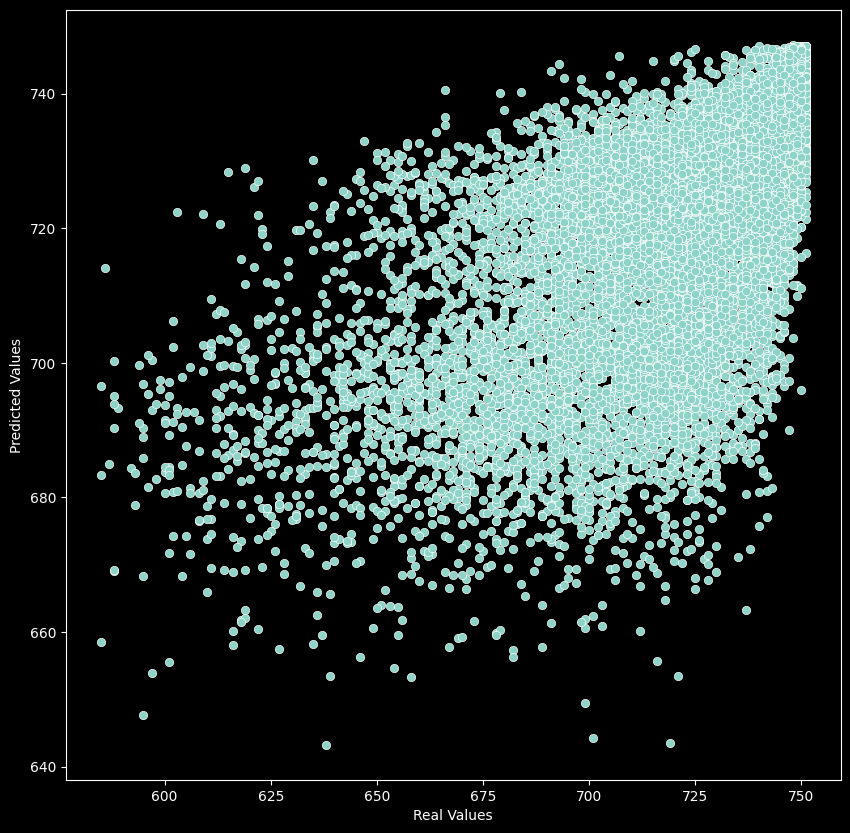

In [ ]:
# ▶ The lower the credit score, the tendency to be fitting.
sns.scatterplot(x='Real Values', y='Predicted Values', data=result)
plt.gcf().set_size_inches(10 ,10)

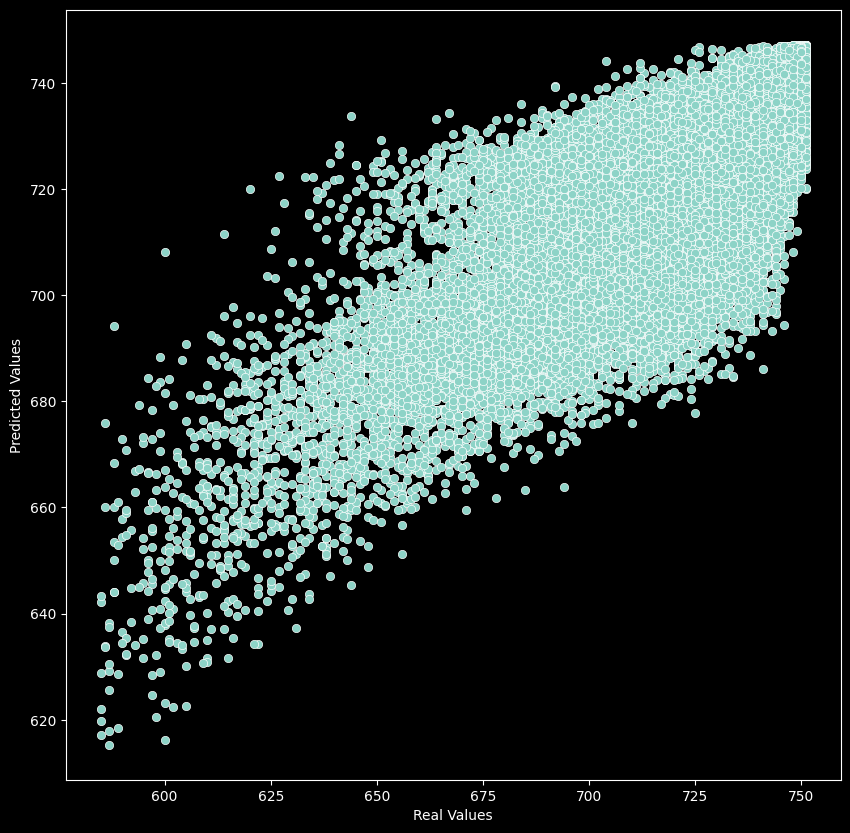

In [ ]:
# ▶ It is well fitted in the Train set
result = pd.DataFrame({'Real Values':y_train, 'Predicted Values':y_pred_train})
sns.scatterplot(x='Real Values', y='Predicted Values', data=result) # Pass data and specify x and y columns as keywords
plt.gcf().set_size_inches(10 ,10)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


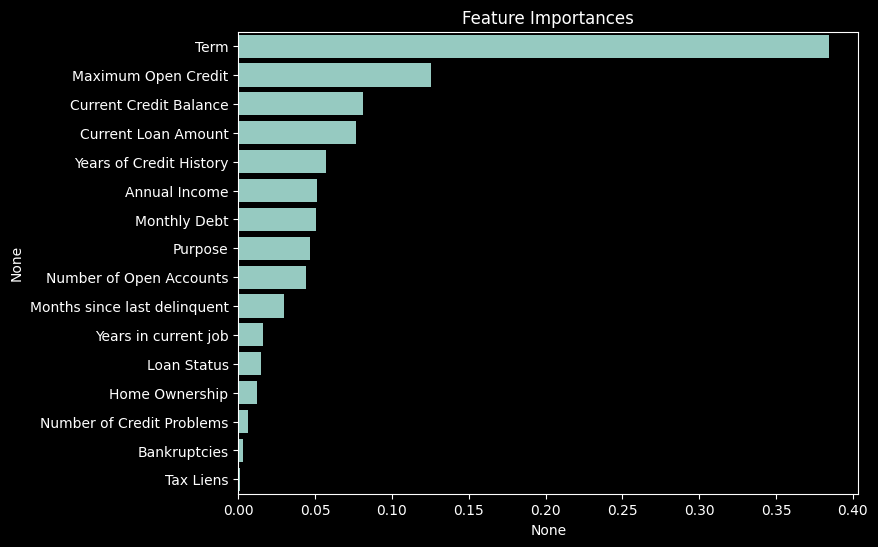

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

<Axes: xlabel='Current Credit Balance', ylabel='Density'>

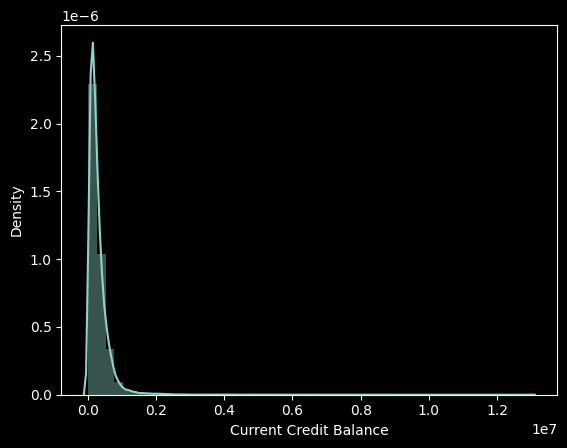

In [ ]:
sns.distplot(df['Current Credit Balance'])

In [ ]:
df['Current Credit Balance'].describe()

,Current Credit Balance
count,5.976100e+04
mean,2.964889e+05
std,3.616377e+05
min,0.000000e+00
25%,1.143040e+05
50%,2.121540e+05
75%,3.702150e+05
max,1.298696e+07


In [ ]:
# ▶ Sectionization
val = 'Current Credit Balance'

import numpy as np
df['gp'] = np.where (df[val] <= 1143045, 1,
                           np.where(df[val] <= 370215, 2, 3))

df[[val,'gp']]

,Current Credit Balance,gp
0,228190.0,1
2,297996.0,1
3,256329.0,1
6,122170.0,1
8,437171.0,1
...,...,...
99990,37392.0,1
99994,456.0,1
99996,153045.0,1
99997,109554.0,1


In [ ]:
# ▶ Details for the important variable 'Current Credit Balance'
df.groupby('gp')['Credit Score'].mean().sort_values(ascending = False)

,Credit Score
gp,
1,720.218991
3,719.886695


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfr)

# Model READ
rfr_from_pickle = pickle.loads(saved_model)